In [2]:
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as mpl

## NEQR Circuit with On and Off Pixels

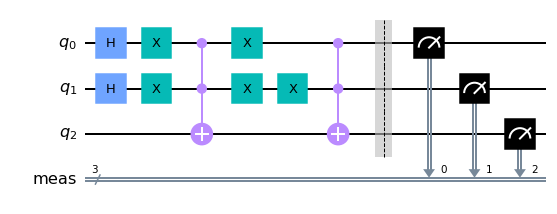

In [21]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)

qc.x(0)
#qc.x(1)
#qc.ccx(0, 1, 2)
#qc.x(0)
#qc.x(1)

qc.x(1)
qc.ccx(0, 1, 2)

qc.x(1)
qc.x(0)
#qc.ccx(0, 1, 2)

qc.x(1)
qc.ccx(0, 1, 2)


qc.measure_all()

qc.draw('mpl')

## NEQR Circuit with pixels holding 4 values

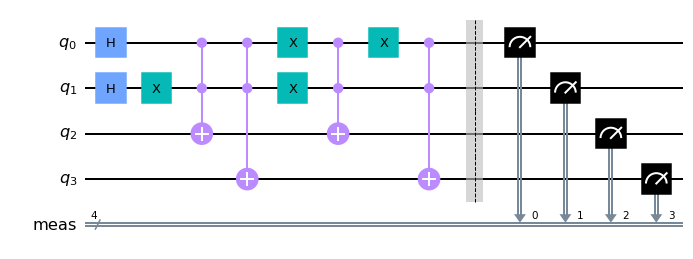

In [46]:
qc = QuantumCircuit(4)

qc.h(0)
qc.h(1)

qc.x(1)

qc.ccx(0, 1, 2)
qc.ccx(0, 1, 3)

qc.x(1)
qc.x(0)
qc.ccx(0, 1, 2)

qc.x(0)
qc.ccx(0, 1, 3)


qc.measure_all()

qc.draw('mpl')

{'0000': 1011, '0110': 1030, '1011': 1050, '1101': 1005}


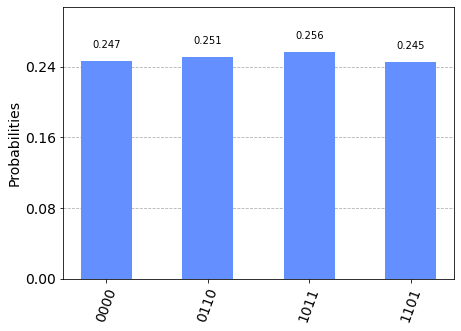

In [44]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=4096)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

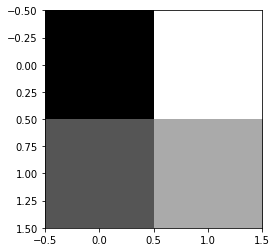

In [45]:
image=[[0, 0], [0, 0]]
values=[[0, 0], [0, 0]]
for x in counts:
    if x[-2:] == '00':
        if counts[x] > values[0][0]:
            values[0][0]=counts[x]
            image[0][0]=int(x[0:-2], 2)
    elif x[-2:] == '01':
        if counts[x] > values[0][1]:
            values[0][1]=counts[x]
            image[0][1]=int(x[0:-2], 2)
    elif x[-2:] == '10':
        if counts[x] > values[1][0]:
            values[1][0]=counts[x]
            image[1][0]=int(x[0:-2], 2)
    elif x[-2:] == '11':
        if counts[x] > values[1][1]:
            values[1][1]=counts[x]
            image[1][1]=int(x[0:-2], 2)
mpl.imshow(image, cmap="gray")